In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
openCloseData=pd.read_csv("openCloseData9.csv")
openCloseData.head()

,Unnamed: 0,AboutMe,Body,Comment,Downvotes,Location,PostId,ProfileImageUrl,Reputation,SOUrlCount,...,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled,websiteUrlFilled
0,0,NaN,<p>Please someone explain complete step by ste...,100,0,NaN,32203002,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,0,0,6,0.0,2,-110.462467,33,0,1,0
1,1,NaN,<p>I've used SFST language for my project on N...,100,0,NaN,31961877,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,3,0,27,0.0,4,-157.135019,25,2,1,0
2,2,<p>Currently a software developer at HiQ Finla...,<p>The following JSON is returned from SharePo...,100,2413,"Helsinki, Finland",22080350,https://i.stack.imgur.com/w2whQ.png,33857,0,...,0,0,25,0.0,3,-279.862500,134,0,4,1
3,3,<p>Love the computer science &amp; technology ...,<p>What's the benifit of allocating a chunk of...,100,3,中国Shanghai Shi,28019349,https://www.gravatar.com/avatar/a33ac21cad99e5...,1470,0,...,0,0,10,0.0,5,-234.970000,78,0,3,0
4,4,NaN,<p>I'm using an S3 bucket as the origin or a C...,100,77,NaN,32211159,NaN,10992,0,...,2,0,35,10.7,4,-527.002535,59,0,0,0


In [3]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)

(159996, 47)
(159996, 46)


In [4]:
openCloseData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [5]:
print(openCloseData.head())

                                             AboutMe  \
0                                                NaN   
1                                                NaN   
2  <p>Currently a software developer at HiQ Finla...   
3  <p>Love the computer science &amp; technology ...   
4                                                NaN   

                                                Body  Comment  Downvotes  \
0  <p>Please someone explain complete step by ste...      100          0   
1  <p>I've used SFST language for my project on N...      100          0   
2  <p>The following JSON is returned from SharePo...      100       2413   
3  <p>What's the benifit of allocating a chunk of...      100          3   
4  <p>I'm using an S3 bucket as the origin or a C...      100         77   

            Location    PostId  \
0                NaN  32203002   
1                NaN  31961877   
2  Helsinki, Finland  22080350   
3     中国Shanghai Shi  28019349   
4                NaN  32211159   

 

In [6]:
closeData = openCloseData[openCloseData['closed'] == 1]

In [7]:
closeData.shape

(79996, 46)

In [8]:
X = closeData.loc[:,['Comment', 'Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
        'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars', 'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount', 'punctuationCount', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled', 'numAns', 'numQues'] ]

X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(79996, 28)
<class 'pandas.core.frame.DataFrame'>


In [9]:
X.reset_index(inplace = True)
X.drop(['index'],inplace=True,axis=1)

In [10]:
print(X.isnull().values.any())
X.head()

False


,Comment,Reputation,experienceInTime,Views,Upvotes,Downvotes,tagCount,lowerUpperRatio,sentenceCount,firstLineLength,...,bodyWordCount,punctuationCount,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex,userProfileFilled,numAns,numQues
0,102,17527,1953,2765,2005,119,4,26.153846,6,69,...,168,50,71.70,-80.10,13.96,0.0,9.83,2,583,209
1,102,151,1425,32,16,0,5,16.448276,10,75,...,113,19,52.99,-26.31,12.32,0.0,11.98,0,0,0
2,102,1639,900,208,75,1,3,18.916667,4,79,...,47,17,17.06,64.54,7.83,0.0,14.97,3,20,13
3,102,2669,620,658,282,11,2,12.272727,5,210,...,94,45,26.89,32.23,9.16,0.0,17.02,4,43,70
4,105,2669,369,658,282,11,2,32.714286,10,35,...,104,128,20.32,53.58,7.94,11.9,15.97,4,43,70


In [11]:
X['Comment']=X['Comment']-102
#print(offTopic.head())
print(X.shape)

(79996, 28)


In [12]:
# print(X[np.isinf(X).any(axis=1)])
y = X.Comment
X.drop(['Comment'],inplace=True,axis=1)
print(y.shape)

(79996,)


In [13]:
print(X.shape)
print(X.columns)

(79996, 27)
Index(['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog', 'fleschReadingEase',
       'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex',
       'userProfileFilled', 'numAns', 'numQues'],
      dtype='object')


In [14]:
print(y[0])
print(y[25000])
print(y[45000])
print(y[65000])

0
1
2
3


In [15]:
# x=(x-u)/std
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog', 'fleschReadingEase',
       'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex',
       'userProfileFilled', 'numAns', 'numQues'])

<class 'numpy.ndarray'>


In [16]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55997, 27)
(55997,)
(23999, 27)
(23999,)


### SVM Classifier

#### 1. With RBF Kernel

In [ ]:
# c = [0.01,0.1,1,10,100,1000]
# accuracy = []
# y_predicted = np.zeros((y_test.shape))
# max_accuracy = 0.0
# rbf_svm_classifier = SVC(kernel = 'rbf')

# for i in c:
#     classifier = SVC(kernel = 'rbf', gamma = 0.25, C = i)
#     classifier.fit(X_train, y_train)
#     predicted_y = classifier.predict(X_test)
#     accuracy.append(np.mean(y_test==predicted_y))
#     print('Accuracy for C = {} is : {:.4f}'.format(i, accuracy[-1]))
#     if(accuracy[-1] > max_accuracy):
#         y_predicted = predicted_y
#         max_accuracy = accuracy[-1]
#         rbf_svm_classifier = classifier

Accuracy for C = 0.01 is : 0.3390
Accuracy for C = 0.1 is : 0.3903
Accuracy for C = 1 is : 0.4106


In [ ]:
# c = [10,100,1000]
# accuracy = []
# y_predicted = np.zeros((y_test.shape))
# max_accuracy = 0.0
# rbf_svm_classifier = SVC(kernel = 'rbf')

# for i in c:
#     classifier = SVC(kernel = 'rbf', gamma = 0.25, C = i)
#     classifier.fit(X_train, y_train)
#     predicted_y = classifier.predict(X_test)
#     accuracy.append(np.mean(y_test==predicted_y))
#     print('Accuracy for C = {} is : {:.4f}'.format(i, accuracy[-1]))
#     if(accuracy[-1] > max_accuracy):
#         y_predicted = predicted_y
#         max_accuracy = accuracy[-1]
#         rbf_svm_classifier = classifier

Accuracy for C = 10 is : 0.3712


In [17]:
rbf_svm_classifier = SVC(kernel = 'rbf')
rbf_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
y_pred = rbf_svm_classifier.predict(X_train)
print('Train Accuracy: ' + str(np.mean(y_train==y_pred)))
print("\n")
print(classification_report(y_train,y_pred))

Train Accuracy: 0.45564940979


             precision    recall  f1-score   support

          0       0.44      0.26      0.33     14081
          1       0.44      0.53      0.48     13884
          2       0.41      0.38      0.39     14084
          3       0.52      0.66      0.58     13948

avg / total       0.45      0.46      0.44     55997



In [19]:
y_pred = rbf_svm_classifier.predict(X_test)
print('Test Accuracy: ' + str(np.mean(y_test==y_pred)))
print("\n")
print(classification_report(y_test,y_pred))

# Test Accuracy: 0.424059335806


#              precision    recall  f1-score   support

#           0       0.36      0.20      0.26      5916
#           1       0.42      0.49      0.45      6116
#           2       0.37      0.34      0.35      5915
#           3       0.50      0.65      0.56      6052

# avg / total       0.41      0.42      0.41     23999


Test Accuracy: 0.424059335806


             precision    recall  f1-score   support

          0       0.36      0.20      0.26      5916
          1       0.42      0.49      0.45      6116
          2       0.37      0.34      0.35      5915
          3       0.50      0.65      0.56      6052

avg / total       0.41      0.42      0.41     23999



In [20]:
#https://scikit-learn.org/stable/modules/model_persistence.html
#EXPORTING RBF SVM
from joblib import dump, load
dump(rbf_svm_classifier, 'rbf_svm_2.joblib') 

['rbf_svm_2.joblib']

In [22]:
#!pip install joblib

#### 5-FOLD CV

In [21]:
k_fold = KFold(n_splits=5)

In [22]:
val_score = cross_val_score(rbf_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

In [23]:
print(val_score)

[ 0.08425     0.21082568  0.09963123  0.07225452  0.02500156]


#### 2. With Linear Kernel

In [24]:
c = list(np.arange(0.1, 15, 1.0))
# c=[0.01,0.1,1,10,100,1000]
accuracy = []
y_predicted = np.zeros((y_test.shape))
max_accuracy = 0.0
linear_svm_classifier = LinearSVC()

for i in c:
    classifier = LinearSVC(C = i)
    classifier.fit(X_train, y_train)
    predicted_y = classifier.predict(X_test)
    accuracy.append(np.mean(y_test==predicted_y))
    print('Accuracy for C = {} is : {:.4f}'.format(i, accuracy[-1]))
    if(accuracy[-1] > max_accuracy):
        y_predicted = predicted_y
        max_accuracy = accuracy[-1]
        linear_svm_classifier = classifier
        
# Accuracy for C = 0.01 is : 0.4034
# Accuracy for C = 0.1 is : 0.4052
# Accuracy for C = 1 is : 0.4057
# Accuracy for C = 10 is : 0.4057
# Accuracy for C = 100 is : 0.3188
# Accuracy for C = 1000 is : 0.2889


Accuracy for C = 0.1 is : 0.4047
Accuracy for C = 1.1 is : 0.4057
Accuracy for C = 2.1 is : 0.4069
Accuracy for C = 3.1 is : 0.4048
Accuracy for C = 4.1 is : 0.4050
Accuracy for C = 5.1 is : 0.4065
Accuracy for C = 6.1 is : 0.4043
Accuracy for C = 7.1 is : 0.4082
Accuracy for C = 8.1 is : 0.4066
Accuracy for C = 9.1 is : 0.4052
Accuracy for C = 10.1 is : 0.3980
Accuracy for C = 11.1 is : 0.3962
Accuracy for C = 12.1 is : 0.4010
Accuracy for C = 13.1 is : 0.4024
Accuracy for C = 14.1 is : 0.4000


In [25]:
print(linear_svm_classifier)

LinearSVC(C=7.0999999999999996, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)


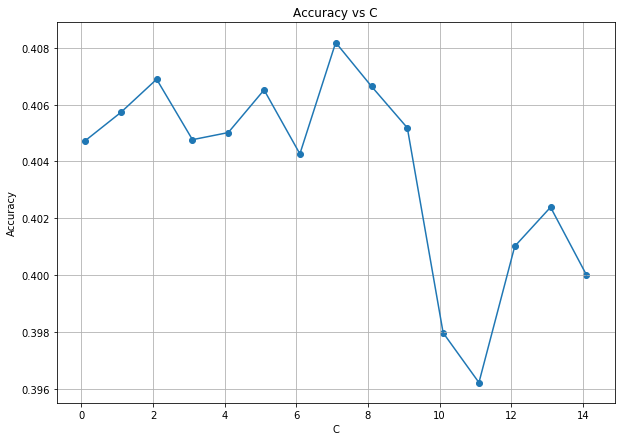

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(c, accuracy)
plt.scatter(c, accuracy)
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [28]:
cross_val_score(linear_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

array([ 0.079375  ,  0.15332208,  0.06819176,  0.07562973,  0.02650166])

In [29]:
y_train_pred = linear_svm_classifier.predict(X_train)
print('Train Accurcay: ', np.mean(y_train == y_train_pred))

Train Accurcay:  0.404164508813


In [30]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.36      0.20      0.26      5916
          1       0.42      0.49      0.45      6116
          2       0.37      0.34      0.35      5915
          3       0.50      0.65      0.56      6052

avg / total       0.41      0.42      0.41     23999

